# 数据的读取

In [1]:
import numpy as np
fileName = 'C:\\Users\\13323\\Desktop\\Jupter Workspace\\lab01\\data\\data.txt' 

data = np.loadtxt(fileName)
print(data.shape)

(625348, 7)


## 对每列数进行探索

第1列的数据的平均数为-7.091530913987093,最小值为-8.8705,最大值为-5.7715
第2列的数据的平均数为18.279688658155145,最小值为15.9285,最大值为20.9065
第3列的数据的平均数为1.6278401210206157,最小值为0.0,最大值为3.187
第4列的数据的平均数为129.92144693834473,最小值为0.0,最大值为255.0
第5列的数据的平均数为132.08235734343117,最小值为2.0,最大值为255.0
第6列的数据的平均数为134.9597520100808,最小值为0.0,最大值为255.0
第7列的数据的平均数为7.927360445703832,最小值为0.0,最大值为11.0


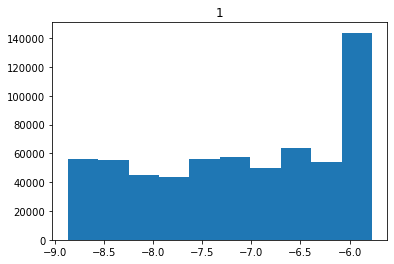

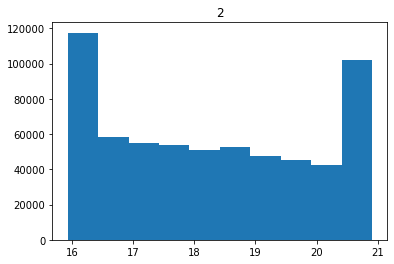

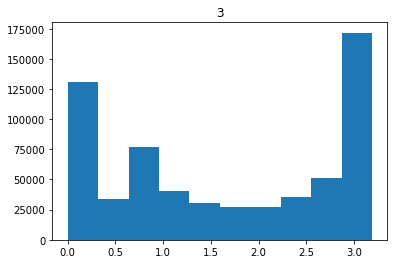

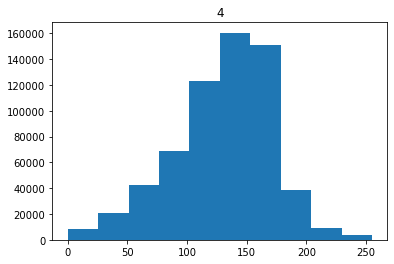

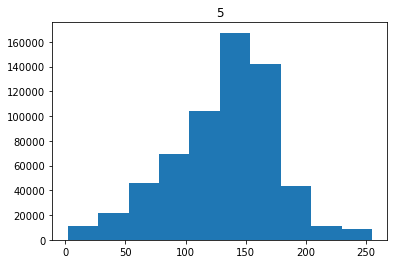

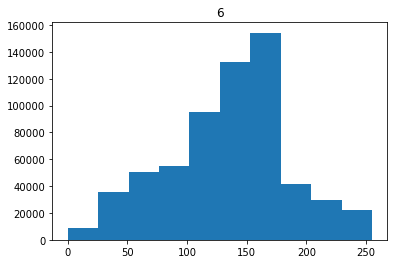

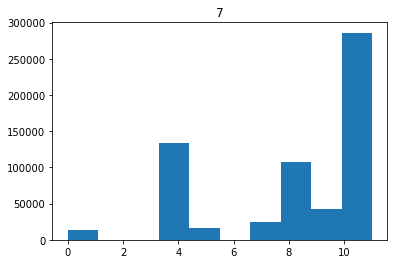

In [3]:
import matplotlib.pyplot as plt
for i in range(0,7): 
  tem = (data[:,i])
  temStr=[np.mean(tem),min(tem), max(tem),i+1]
  print('第{3}列的数据的平均数为{0},最小值为{1},最大值为{2}'.format(*temStr))
  plt.figure()
  plt.hist(tem)
  plt.title(i+1)

## 由各列数据的统计值和统计图像进行猜测：
* 第1~3列为位置数据，因为区间较小
* 第4~6列为RGB数据，因为最大值255，同时存在三列
* 第7列数据可能是对图像的划分，可能是扫描时的次数或者波段等

### 按第7列特征将数据进行切片,尝试探索各数组绘图的情况
* 第7列数分别为：0 4 5 7 8 9 10 11

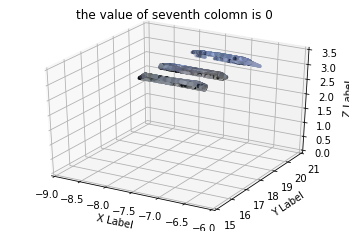

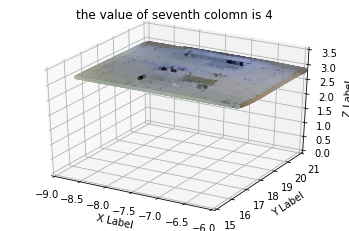

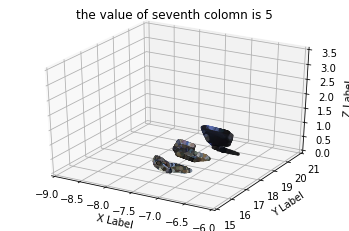

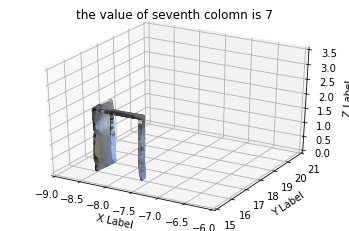

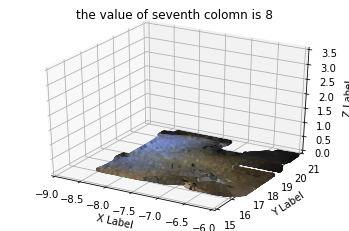

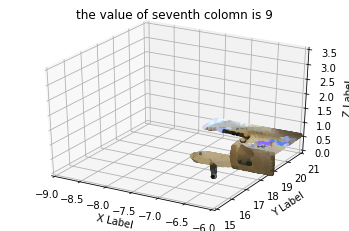

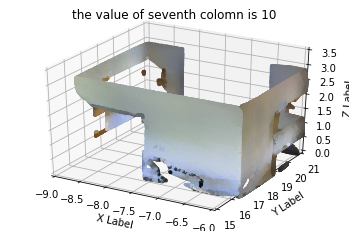

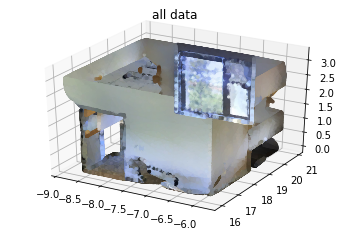

In [14]:
import mpl_toolkits.mplot3d

for i in [0,4,5,7,8,9,10]:
  #源数据准备
  tem_bool = (data[:,6] == i)
  tem = data[tem_bool]
  #坐标数据准备
  x = tem[:,0]
  y = tem[:,1]
  z = tem[:,2]
  #颜色数据准备
  colorM =tem[...,3:6]/255
  #绘图
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.scatter(x,y,z,s=5,color= colorM)
  #根据统计部分数据可以得出
  ax.set_xlabel("X Label")
  ax.set_xlim(-9,-6)
  ax.set_ylabel("Y Label")
  ax.set_ylim(15,21)
  ax.set_zlabel("Z Label")  
  ax.set_zlim(0,3.5)
  plt.title('the value of seventh colomn is {}'.format(i))
  plt.show()


#绘制全图
x = data[:,0]
y = data[:,1]
z = data[:,2]
colorM = data[:,3:6]/255
img = plt.figure()
ax2 = plt.axes(projection = '3d')
ax2.scatter(x,y,z,s=5,c = colorM)
plt.title('all data')
plt.show()

## 分析
* 由总体图像可得知，本数据是房屋的激光点云数据
* 根据第7列数据对数据进行切片猜测第7列数据房屋不同内容的标识  

第7列数值 | 猜测可能的物体 
- | -
0 | 房顶管道
4 | 房顶
5 | 未知
7 | 门
8 | 地毯
9 | 桌子和椅子
10 | 房屋墙壁